In [219]:
from us import states
from pathlib import Path
from census import Census
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src/')

In [220]:
from utils import plotly_us_census

In [2]:
import census

* 2009 https://api.census.gov/data/2009/acs5?
* 2011 https://api.census.gov/data/2011/acs/acs5?
* 2012 http://api.census.gov/data/2012/acs/acs5?
* 2015 https://api.census.gov/data/2015/acs/acs5?get=NAME,B01001_001E&for=state:*
* 2016 https://api.census.gov/data/2016/acs/acs5?get=NAME,group(B01001)&for=us:1
* 2017 https://api.census.gov/data/2017/acs/acs5?get=NAME,group(B01001)&for=us:1
* 

In [3]:
sys.path.append('../.keys')

In [8]:
apikey = json.load(open(Path('../.keys')/'census_keys.json','r'))['APIKEY']

In [9]:
c = Census(apikey)

In [6]:
#c.acs5.state('B24041_006E', '*',year=2015)

In [234]:
data1 = c.acs5.get('B25013_006E', geo={'for': 'county:*', 'in': 'state:*'},year =2016)

In [11]:
pd.DataFrame(data1).shape

(3220, 3)

In [24]:
data2 = c.acs5.get('B25013_001E', geo={'for': 'county:*', 'in': 'state:*'}, year=2009)
d2 = pd.DataFrame(data2)

In [22]:
np.arange(2009,2018)

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [12]:
year2df = {}
for year in np.arange(2009,2018):
    print(year)
    
    df = pd.DataFrame(c.acs5.get('B25013_001E', geo={'for': 'county:*', 'in': 'state:*'}, year=year))
    df['fips'] = df['state'].astype(str) + df['county'].astype(str) 
    year2df.update({year:df})

2009
2010
2011
2012
2013
2014
2015
2016
2017


In [64]:
clean_year2df = {}
for key,val in year2df.items():
    val2 = val.copy(deep=True)
    val2 = val2.rename(columns = {'B25013_001E':str(key)})
    val2.drop(['state','county'],inplace=True,axis=1)
    val2.set_index('fips',inplace=True)
    clean_year2df.update({key:val2})

In [79]:
year2df_pop = {}
for year in np.arange(2009,2018):
    print(year)
    
    df = pd.DataFrame(c.acs5.get('B01001_001E', geo={'for': 'county:*', 'in': 'state:*'}, year=year))
    df['fips'] = df['state'].astype(str) + df['county'].astype(str) 
    year2df_pop.update({year:df})

2009
2010
2011
2012
2013
2014
2015
2016
2017


In [88]:
clean_year2df_pop = {}
for key,val in year2df_pop.items():
    val2 = val.copy(deep=True)
    val2 = val2.rename(columns = {'B01001_001E':str(key)})
    val2.drop(['state','county'],inplace=True,axis=1)
    val2.set_index('fips',inplace=True)
    clean_year2df_pop.update({key:val2})

In [66]:
all_years = pd.concat(list(clean_year2df.values()), axis=1)

In [119]:
all_years.dtypes

2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object

In [91]:
all_years_pop = pd.concat(list(clean_year2df_pop.values()), axis=1)

In [120]:
all_years_pop = all_years_pop.dropna().astype(float)

In [216]:
all_years.to_csv('../data/B25013_001E.csv')

In [218]:
all_years_pop.to_csv('../data/population_census_B01001_001E.csv')

In [165]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

In [113]:
all_years_pop.dtypes

2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016     object
2017     object
dtype: object

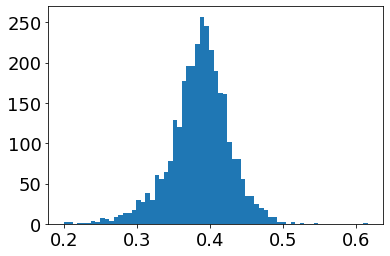

In [215]:
plt.hist((all_years/all_years_pop)['2017'], bins='auto');

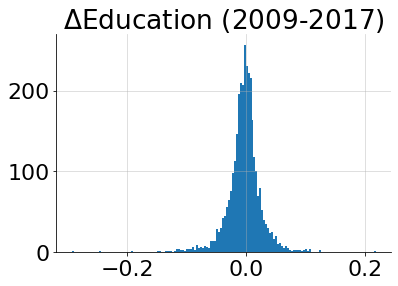

In [146]:
plt.grid(alpha=.5,zorder=1)
plt.hist((all_years/all_years_pop)['2017']- (all_years/all_years_pop)['2009'], bins='auto',zorder=0);
plt.title('$\Delta$Education (2009-2017)')

ax= plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('delta_education.pdf')

In [192]:
ourmax = ((all_years/all_years_pop)['2017']- (all_years/all_years_pop)['2009']).max()
ourmin = ((all_years/all_years_pop)['2017']- (all_years/all_years_pop)['2009']).min()
percentchange = ((all_years/all_years_pop)['2017']- (all_years/all_years_pop)['2009'])

In [193]:
percentchange[percentchange==ourmax] # Archuleta County, CO  population

08007    0.21899
dtype: float64

In [194]:
percentchange[percentchange==ourmin]

15005   -0.293977
dtype: float64

In [162]:
percentchange[percentchange>.1] 

02013    0.123286
02016    0.108310
08007    0.218990
08091    0.100582
08105    0.103898
12029    0.122768
30007    0.100427
32019    0.100902
46075    0.101024
72037    0.106984
72054    0.106520
dtype: float64

In [196]:
percentchange[percentchange<-.1].sort_values()

15005   -0.293977
36041   -0.244457
49009   -0.190722
48261   -0.150139
48263   -0.146086
35011   -0.134483
06003   -0.132381
48317   -0.128453
48211   -0.125501
49033   -0.118298
35003   -0.115938
48275   -0.115322
48207   -0.114871
32021   -0.112787
29197   -0.112279
08073   -0.112182
16085   -0.108726
20075   -0.108218
01105   -0.106018
02105   -0.104244
48047   -0.102413
40059   -0.100729
48389   -0.100094
dtype: float64

In [198]:
all_years_pop.loc['36041']

2009    5011.0
2010    4908.0
2011    4870.0
2012    4835.0
2013    4813.0
2014    4783.0
2015    4760.0
2016    4697.0
2017    4646.0
Name: 36041, dtype: float64

In [157]:
all_years.loc['08007']

2009    2714.0
2010    3377.0
2011    3951.0
2012    4536.0
2013    4881.0
2014    5343.0
2015    5334.0
2016    5382.0
2017    5553.0
Name: 08007, dtype: float64

In [158]:
all_years_pop.loc['08007']

2009    12225.0
2010    12136.0
2011    12152.0
2012    12109.0
2013    12109.0
2014    12132.0
2015    12174.0
2016    12355.0
2017    12592.0
Name: 08007, dtype: float64

In [212]:
plt.plot((all_years.loc['08007']/all_years_pop.loc['08007']), marker='o')
plt.ylabel('Education rate')
plt.xticks(rotation=70)
a2 = plt.twinx()
a2.plot((all_years_pop.loc['08007']-all_years_pop.loc['08007'].shift())/all_years_pop.loc['08007'], marker='o', color='orange')
a2.set_ylabel('Population growth')



Text(0, 0.5, 'Population growth')

In [211]:
# least populous county in New York (Hamilton County)
plt.plot((all_years.loc['36041']/all_years_pop.loc['36041']), marker='o')
#plt.plot((all_years.loc['36041']/all_years.loc['36041'][0]), marker='o')
plt.ylabel('Education rate')
plt.xticks(rotation=70)
a2 = plt.twinx()
a2.plot((all_years_pop.loc['36041']-all_years_pop.loc['36041'].shift())/all_years_pop.loc['36041'], marker='o', color='orange')
#a2.plot(all_years_pop.loc['36041']/all_years_pop.loc['36041'][0], marker='o', color='orange')
a2.set_ylabel('Population growth')

Text(0, 0.5, 'Population growth')

Hamilton County has half the number of people with Bachelors degrees as it did in 2009. 

### plot with plotly

In [227]:
pd.DataFrame(all_years['2009']/all_years_pop['2009'])

2009
01001  0.368829
01003  0.398245
01005  0.358865
01007  0.350587
01009  0.338497
...         ...
72145  0.289254
72147  0.326840
72149  0.243362
72151  0.292218
72153  0.300701

[3223 rows x 1 columns]

In [228]:
edu_09 = pd.DataFrame(all_years['2009']/all_years_pop['2009'])

In [230]:
edu_09.index.values

array(['01001', '01003', '01005', ..., '72149', '72151', '72153'],
      dtype=object)

In [233]:
plotly_us_census(edu_09, '2009', '2009', locations=edu_09.index.values,save_loc = Path('./'))

Running census map from API...


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [208]:
all_years.loc['36041']

2009    2406.0
2010    2381.0
2011    2303.0
2012    2134.0
2013    1854.0
2014    1639.0
2015    1376.0
2016    1239.0
2017    1095.0
Name: 36041, dtype: float64

In [209]:
all_years_pop.loc['36041']

2009    5011.0
2010    4908.0
2011    4870.0
2012    4835.0
2013    4813.0
2014    4783.0
2015    4760.0
2016    4697.0
2017    4646.0
Name: 36041, dtype: float64

/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joshuaminot/anaconda3/envs/us_counties_cs395_3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


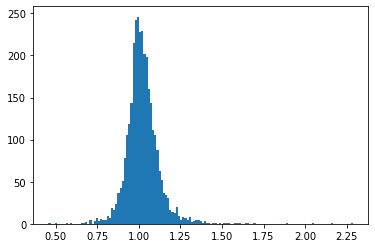

In [78]:
plt.hist(all_years['2017'] / all_years['2009'], bins='auto');
#plt.xlim(-1000,1000)

In [77]:
(all_years['2017'] / all_years['2009'])

2.287323943661972

In [47]:
year2df[2016]['state'].astype(str) + year2df[2016]['county'].astype(str) 

0       05015
1       05017
2       05019
3       05021
4       05023
        ...  
3215    72091
3216    72075
3217    72119
3218    72021
3219    72029
Length: 3220, dtype: object

In [15]:
c.acs5.state(('NAME', 'B25034_010E'), states.MD.fips, year=2015)

[{'NAME': 'Maryland', 'B25034_010E': 137303.0, 'state': '24'}]

In [17]:
c.sf1.get('NAME', geo={'for': 'tract:*',
                       'in': 'state:{} county:170'.format(states.AK.fips)})

[{'NAME': 'Census Tract 1.01, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000101'},
 {'NAME': 'Census Tract 1.02, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000102'},
 {'NAME': 'Census Tract 2, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000200'},
 {'NAME': 'Census Tract 3, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000300'},
 {'NAME': 'Census Tract 4.01, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000401'},
 {'NAME': 'Census Tract 4.02, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000402'},
 {'NAME': 'Census Tract 5.01, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000501'},
 {'NAME': 'Census Tract 5.02, Matanuska-Susitna Borough, Alaska',
  'state': '02',
  'county': '170',
  'tract': '000502'},
 {'NAME': 'Cen